In [89]:
import pandas as pd
import urllib.parse

sheet_id = '1BHJvBGU5nXPwrEe3D7PJe2GtQGshApAV-eNOfNC4o90'
sheet_name = 'Form Responses 1'

def google_sheet_csv(id, name):
    sheet = urllib.parse.quote_plus(name)
    return f'https://docs.google.com/spreadsheets/d/{id}/gviz/tq?tqx=out:csv&sheet={sheet}'


df = pd.read_csv(google_sheet_csv(sheet_id, sheet_name))

df.head()

,Timestamp,How old are you? (Full years),Which gender do you identify with?,What month were you born in?,Which semester are you studying in?,What was your Python experience BEFORE the course?,What was your statistics knowledge BEFORE the course?,How long is your daily commute to university? (Estimate one-way in minutes),Do you prefer online or in-person lectures?,Do you prefer a continuous project or isolated exercises?,Unnamed: 10
0,4/30/2024 15:30:06,25.0,Male,April,1,No previous experience,Knew some basic concepts (statistical paramete...,20.0,5,3,NaN
1,4/30/2024 15:30:56,25.0,Male,May,1,No previous experience,No previous knowledge,20.0,1,1,NaN
2,4/30/2024 15:31:11,24.0,Male,March,1,No previous experience,Knew some basic concepts (statistical paramete...,47.0,5,4,NaN
3,4/30/2024 15:31:42,27.0,Male,September,1,No previous experience,Knew some basic concepts (statistical paramete...,45.0,2,3,NaN
4,4/30/2024 15:32:03,22.0,Male,January,1,No previous experience,No previous knowledge,20.0,4,3,NaN


In [90]:
# Loaded variable 'df' from kernel state

# Drop column: 'Timestamp'
df = df.drop(columns=['Timestamp'])

# Rename column 'How old are you? (Full years)' to 'age'
df = df.rename(columns={'How old are you? (Full years)': 'age'})

# Rename column 'Which gender do you identify with?' to 'gender'
df = df.rename(columns={'Which gender do you identify with?': 'gender'})

# Rename column 'What month were you born in?' to 'month'
df = df.rename(columns={'What month were you born in?': 'month'})

# Rename column 'Which semester are you studying in?' to 'semester'
df = df.rename(columns={'Which semester are you studying in?': 'semester'})

# Rename column 'What was your Python experience BEFORE the course?' to 'python'
df = df.rename(columns={'What was your Python experience BEFORE the course?': 'python'})

# Rename column 'What was your statistics knowledge BEFORE the course?' to 'stats'
df = df.rename(columns={'What was your statistics knowledge BEFORE the course?': 'stats'})

# Rename column 'How long is your daily commute to university? (Estimate one-way in minutes)' to 'commute'
df = df.rename(columns={'How long is your daily commute to university? (Estimate one-way in minutes)': 'commute'})

# Rename column 'Do you prefer online or in-person lectures?' to 'mode'
df = df.rename(columns={'Do you prefer online or in-person lectures?': 'mode'})

# Rename column 'Do you prefer a continuous project or isolated exercises?' to 'exercises'
df = df.rename(columns={'Do you prefer a continuous project or isolated exercises?': 'exercises'})

df.head()

,age,gender,month,semester,python,stats,commute,mode,exercises,Unnamed: 10
0,25.0,Male,April,1,No previous experience,Knew some basic concepts (statistical paramete...,20.0,5,3,NaN
1,25.0,Male,May,1,No previous experience,No previous knowledge,20.0,1,1,NaN
2,24.0,Male,March,1,No previous experience,Knew some basic concepts (statistical paramete...,47.0,5,4,NaN
3,27.0,Male,September,1,No previous experience,Knew some basic concepts (statistical paramete...,45.0,2,3,NaN
4,22.0,Male,January,1,No previous experience,No previous knowledge,20.0,4,3,NaN


In [91]:
# Loaded variable 'df' from kernel state

# Replace missing values with the median of each column in: 'age'
df = df.fillna({'age': df['age'].median()})

# Replace missing values with the median of each column in: 'commute'
df = df.fillna({'commute': df['commute'].median()})

df.head()

,age,gender,month,semester,python,stats,commute,mode,exercises,Unnamed: 10
0,25.0,Male,April,1,No previous experience,Knew some basic concepts (statistical paramete...,20.0,5,3,NaN
1,25.0,Male,May,1,No previous experience,No previous knowledge,20.0,1,1,NaN
2,24.0,Male,March,1,No previous experience,Knew some basic concepts (statistical paramete...,47.0,5,4,NaN
3,27.0,Male,September,1,No previous experience,Knew some basic concepts (statistical paramete...,45.0,2,3,NaN
4,22.0,Male,January,1,No previous experience,No previous knowledge,20.0,4,3,NaN


In [92]:
# Replace all instances of "No previous experience" with "0" in column: 'python'
df['python'] = df['python'].str.replace("No previous experience", "0", case=False, regex=False)

# Replace all instances of "Had Python installed and played with it (basic tutorials)" with "1" in column: 'python'
df['python'] = df['python'].str.replace("Had Python installed and played with it (basic tutorials)", "1", case=False, regex=False)

# Replace all instances of "Used Python in class or on personal projects" with "2" in column: 'python'
df['python'] = df['python'].str.replace("Used Python in class or on personal projects", "2", case=False, regex=False)

df.head()

,age,gender,month,semester,python,stats,commute,mode,exercises,Unnamed: 10
0,25.0,Male,April,1,0,Knew some basic concepts (statistical paramete...,20.0,5,3,NaN
1,25.0,Male,May,1,0,No previous knowledge,20.0,1,1,NaN
2,24.0,Male,March,1,0,Knew some basic concepts (statistical paramete...,47.0,5,4,NaN
3,27.0,Male,September,1,0,Knew some basic concepts (statistical paramete...,45.0,2,3,NaN
4,22.0,Male,January,1,0,No previous knowledge,20.0,4,3,NaN


In [93]:
# Replace all instances of "No previous knowledge" with "0" in column: 'stats'
df['stats'] = df['stats'].str.replace("No previous knowledge", "0", case=False, regex=False)

# Replace all instances of "Knew some basic concepts (statistical parameters, mean, median, ...)" with "1" in column: 'stats'
df['stats'] = df['stats'].str.replace("Knew some basic concepts (statistical parameters, mean, median, ...)", "1", case=False, regex=False)

# Replace all instances of "Knew some of the topics from the course" with "2" in column: 'stats'
df['stats'] = df['stats'].str.replace("Knew some of the topics from the course", "2", case=False, regex=False)

df.head()

,age,gender,month,semester,python,stats,commute,mode,exercises,Unnamed: 10
0,25.0,Male,April,1,0,1,20.0,5,3,NaN
1,25.0,Male,May,1,0,0,20.0,1,1,NaN
2,24.0,Male,March,1,0,1,47.0,5,4,NaN
3,27.0,Male,September,1,0,1,45.0,2,3,NaN
4,22.0,Male,January,1,0,0,20.0,4,3,NaN


In [94]:
# Change column type to int8 for columns: 'stats', 'python'
df = df.astype({'python': 'int8', 'stats': 'int8', 'mode': 'int8', 'exercises': 'int8'})

df.head()

,age,gender,month,semester,python,stats,commute,mode,exercises,Unnamed: 10
0,25.0,Male,April,1,0,1,20.0,5,3,NaN
1,25.0,Male,May,1,0,0,20.0,1,1,NaN
2,24.0,Male,March,1,0,1,47.0,5,4,NaN
3,27.0,Male,September,1,0,1,45.0,2,3,NaN
4,22.0,Male,January,1,0,0,20.0,4,3,NaN


In [95]:
# Loaded variable 'df' from kernel state

# Scale column 'mode' between -2 and 2
new_min, new_max = -2, 2
old_min, old_max = df['mode'].min(), df['mode'].max()
df['mode'] = (df['mode'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

# Scale column 'exercises' between -2 and 2
new_min, new_max = -2, 2
old_min, old_max = df['exercises'].min(), df['exercises'].max()
df['exercises'] = (df['exercises'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

df.head()

,age,gender,month,semester,python,stats,commute,mode,exercises,Unnamed: 10
0,25.0,Male,April,1,0,1,20.0,2.0,0.0,NaN
1,25.0,Male,May,1,0,0,20.0,-2.0,-2.0,NaN
2,24.0,Male,March,1,0,1,47.0,2.0,1.0,NaN
3,27.0,Male,September,1,0,1,45.0,-1.0,0.0,NaN
4,22.0,Male,January,1,0,0,20.0,1.0,0.0,NaN


<Axes: >

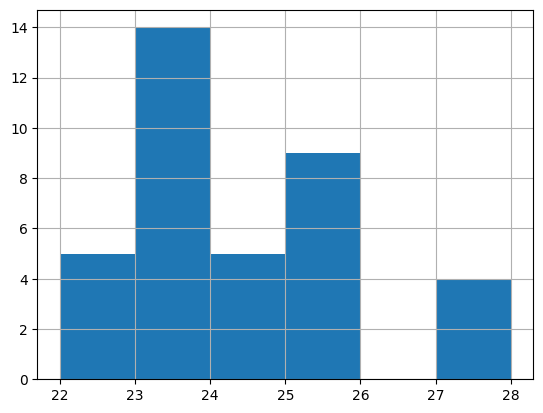

In [96]:
df['age'].hist(bins=6)

<Axes: xlabel='gender', ylabel='count'>

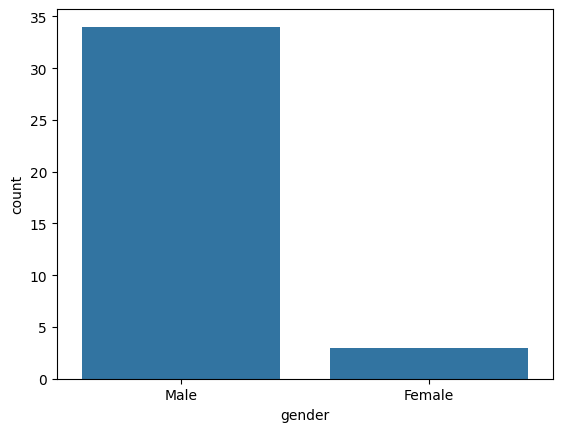

In [97]:
import seaborn as sns

sns.countplot(x='gender', data=df)

<Axes: xlabel='month', ylabel='count'>

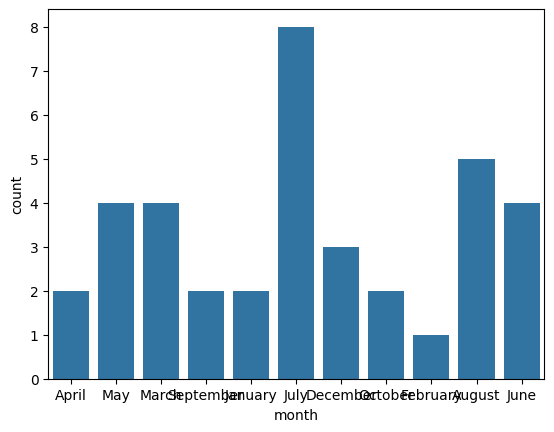

In [98]:
import seaborn as sns

sns.countplot(x='month', data=df)

## Do students prefer online or in-person lectures?

We use the following scale to determine preference:

* $2$: Strong preference for in-person
* $1$: Slight preference for in-person
* $0$: Indifferent
* $-1$: Slight preference for online
* $-2$: Strong preference for online

Let's get a first impression of the average preference:

In [99]:
df['mode'].mean()

0.9459459459459459

Since $\bar{x} > 0$, we suspect there actually is a preference for in-person lectures.

But is this statistically significant? Let's test this!

1. What are the hypotheses?

Two-sided test: Test whether students have any preference or are indifferent.

* $H_0: \bar{x} = 0$ (No preference on average)
* $H_A: \bar{x} \neq 0$ (There is a preference on average)

One-sided test: Test whether students have a specific preference or not.

* $H_0: \bar{x} \leq 0$ (No preference or online preferred on average)
* $H_A: \bar{x} > 0$ (In-person preferred on average)

2. Determine the applicable test:

We want to test a hypothesis about the **mean**, so we use a **t-test**.
We have a single sample and a reference value ($0$), so we use a **one-sample t-test**.

3. Perform the test:

Two-sided one-sample t-test:

In [100]:
from scipy import stats

#     There goes our reference value: V
result2 = stats.ttest_1samp(df['mode'], popmean=0, alternative='two-sided')
result2

TtestResult(statistic=4.01624353636326, pvalue=0.0002875168439571899, df=36)

In [101]:
if result2.pvalue < 0.05:
    print('Reject H0.')
else:
    print('Fail to reject H0.')

Reject H0.


One-sided one-sample t-test:

In [102]:
from scipy import stats

#     There goes our reference value: V
result1 = stats.ttest_1samp(df['mode'], popmean=0, alternative='greater')
result1

TtestResult(statistic=4.01624353636326, pvalue=0.00014375842197859496, df=36)

In [103]:
if result1.pvalue < 0.05:
    print('Reject H0.')
else:
    print('Fail to reject H0.')

Reject H0.


Let's compare results:

In [104]:
result1.statistic == result2.statistic, result1.pvalue == result2.pvalue

(True, False)

Even though we have the same test statistic, we get different p-values.

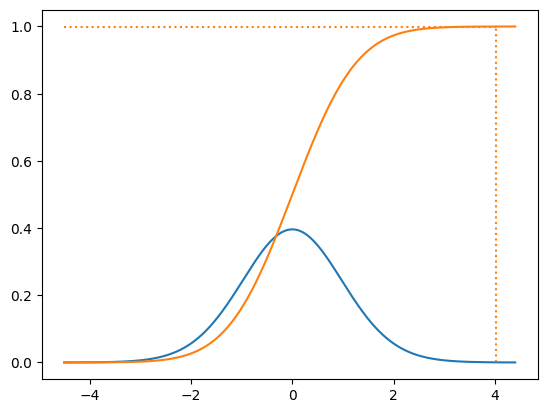

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plines(plt, x, f, colors=None, linestyles='dotted'):
    plt.vlines(x, 0, 1, linestyles=linestyles, colors=colors)
    plt.hlines(f(x), -4.5, x, linestyles=linestyles, colors=colors)

x = np.arange(-4.5, 4.4, 0.001)
plt.plot(x, stats.t.pdf(x, df=36)); None
plt.plot(x, stats.t.cdf(x, df=36)); None
plines(plt, result1.statistic, lambda x: stats.t.cdf(x, df=36), colors='tab:orange')